# Stock Price Vs Stock Google Searches

## Introduction:

This notebook is to explore the relation that search interest in a stock ticker has to do with the historical information for that stock. The data will be taken from historical stock data provided from Yahoo Finance and from search interest data gathered from Google Trends. For the purposes of this project I will only be looking at the level of search interest by observing the level of searches for the stocks ticker symbol. Another way of observing interest would be to look at searches for "x stock" or "x stock price", but I will only be using the tickers for this project. I will explore whether there is correlation between the absolute percent change in the stock and search interest in a stock. I will aslo explore whether there is correlation between stock trading volume and search interest in a stock.

#### Imports:

In [ ]:
# To use dataframes & view csv file from google
import pandas as pd
from pandas import Series, DataFrame
import numpy as np

# To visualize data
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from datetime import datetime

# To get data from yahoo
import pandas_datareader as pdr

# To get search data from google
import pytrends
from pytrends.request import TrendReq

import statsmodels.formula.api as sm

#### Retrieving data from Yahoo Finance:

In [2]:
stock_list = ['PRPL','TSLA','GOOG']

end = datetime.now()
start = datetime(end.year - 1,end.month,end.day)

# Retrieve the data. Each stock historical data stored under dataframe object named under stock ticker
for stock in stock_list:
    globals()[stock] = pdr.get_data_yahoo(stock,start,end)

#### Viewing Stock Data

In [3]:
PRPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-30,8.639,8.270,8.58,8.57,361700,8.57
2019-12-31,8.790,8.405,8.49,8.71,201100,8.71
2020-01-02,9.370,8.710,8.77,9.19,302500,9.19
2020-01-03,9.600,9.010,9.02,9.16,243500,9.16
2020-01-06,9.530,9.180,9.23,9.46,520100,9.46


#### Plotting Stock Closing Price Over Time:

Text(0, 0.5, 'Closing Price')

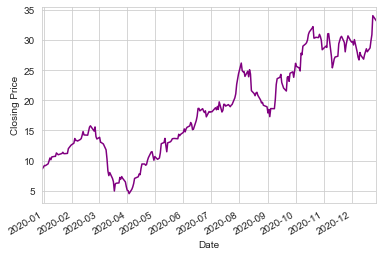

In [4]:
PRPL['Close'].plot(color = ('purple'))
plt.xlabel('Date')
plt.ylabel('Closing Price')

#### Function to convert daily stock data to weekly:

In [5]:
def convert_to_weekly(df):
    
    
    df['Date'] = df.index 
    df[['Date','High','Low','Open','Close','Volume','Adj Close']]
    df['Date'] = pd.to_datetime(df['Date'])
    df.set_index('Date', inplace=True)
    df.sort_index(inplace=True)
    
    # Resample all of the data to convert data to weekly
    output = df.resample('W',loffset=pd.offsets.timedelta(days=-7)).apply(
        {'Open': 'first',
         'High': 'max',
         'Low': 'min',
         'Close': 'last',
         'Volume': 'sum',
         'Adj Close': 'last'})
    
    # Output of the new dataframes
    output = output[['Open', 'High', 'Low', 'Close', 'Volume','Adj Close']]
    df =  output
    return df

#### Using function on Stock Data:

In [6]:
PRPL = convert_to_weekly(PRPL)
TSLA = convert_to_weekly(TSLA)
GOOG = convert_to_weekly(GOOG)

#### Viewing converted stock data:

In [7]:
GOOG.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2019-12-29,1350.000000,1372.500000,1329.084961,1360.660034,4605700,1360.660034
2020-01-05,1350.000000,1434.928955,1350.000000,1429.729980,8084600,1429.729980
2020-01-12,1436.130005,1481.295044,1426.020020,1480.390015,8063800,1480.390015
2020-01-19,1479.119995,1503.213989,1465.250000,1466.709961,6783300,1466.709961
2020-01-26,1431.000000,1470.130005,1421.199951,1434.229980,8166900,1434.229980


#### Retreiving data from Google Trends using pytrend

In [8]:
pytrend = TrendReq()
pytrend.build_payload(kw_list=['PRPL'],
     cat=0,
     timeframe= 'today 12-m')
sPRPL = pytrend.interest_over_time()
sPRPL = sPRPL.drop(columns = 'isPartial')

In [9]:
pytrend = TrendReq()
pytrend.build_payload(kw_list=['TSLA'],
     cat=0,
     timeframe= 'today 12-m')
sTSLA = pytrend.interest_over_time()
sTSLA = sTSLA.drop(columns = 'isPartial')

In [10]:
pytrend = TrendReq()
pytrend.build_payload(kw_list=['GOOG'],
     cat=0,
     timeframe= 'today 12-m')
sGOOG = pytrend.interest_over_time()
sGOOG = sGOOG.drop(columns = 'isPartial')

#### Plotting search interest data:

Text(0, 0.5, 'Ticker Search Interest')

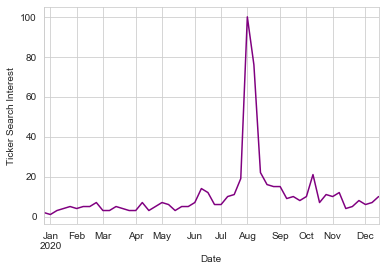

In [11]:
sPRPL['PRPL'].plot(color=('purple'))
plt.xlabel('Date')
plt.ylabel('Ticker Search Interest')

#### Concatinating the two dataframes into one:

In [12]:
dfPRPL = pd.concat([PRPL,sPRPL],axis=1)
dfTSLA = pd.concat([TSLA,sTSLA],axis=1)
dfGOOG = pd.concat([GOOG,sGOOG],axis=1)

#### Viewing new datatable:

In [13]:
dfPRPL.head()

,Open,High,Low,Close,Volume,Adj Close,PRPL
2019-12-29,8.58,9.60,8.27,9.16,1108800,9.16,2.0
2020-01-05,9.23,10.63,9.18,10.61,2358300,10.61,1.0
2020-01-12,10.50,11.74,10.11,10.97,2095600,10.97,3.0
2020-01-19,10.98,11.92,10.75,11.15,1311500,11.15,4.0
2020-01-26,11.13,12.75,10.74,12.57,2477800,12.57,5.0


In [14]:
dfPRPL['Return'] = dfPRPL['Adj Close'].pct_change()
dfPRPL['AbsolutePctChange'] = dfPRPL['Return'].abs()

dfTSLA['Return'] = dfTSLA['Adj Close'].pct_change()
dfTSLA['AbsolutePctChange'] = dfTSLA['Return'].abs()

dfGOOG['Return'] = dfGOOG['Adj Close'].pct_change()
dfGOOG['AbsolutePctChange'] = dfGOOG['Return'].abs()

dfPRPL = dfPRPL.dropna()
dfTSLA = dfTSLA.dropna()
dfGOOG = dfGOOG.dropna()

#### Viewing regression plots for % change and search interest:

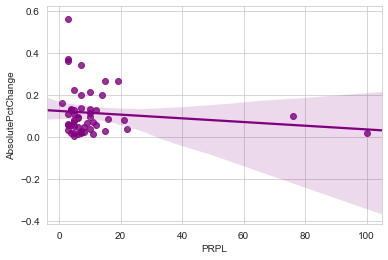

In [18]:
sns.regplot(x = dfPRPL['PRPL'], y = dfPRPL['AbsolutePctChange'], color = 'purple')

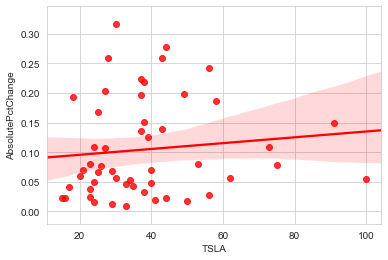

In [17]:
sns.regplot( x = dfTSLA['TSLA'], y = dfTSLA['AbsolutePctChange'], color = 'red')

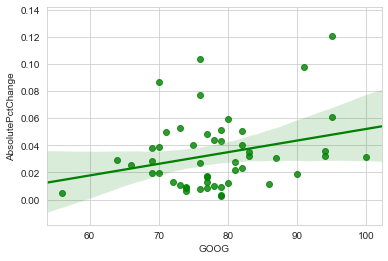

In [19]:
sns.regplot(x = dfGOOG['GOOG'], y = dfGOOG['AbsolutePctChange'], color = 'green')

#### Viewing regression plots for trading volume and search interest

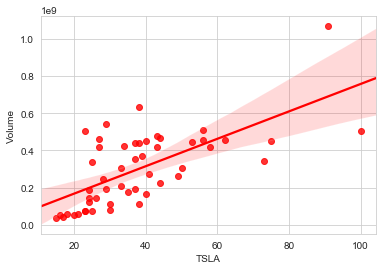

In [20]:
sns.regplot(x = dfTSLA['TSLA'], y = dfTSLA['Volume'], color = 'red')

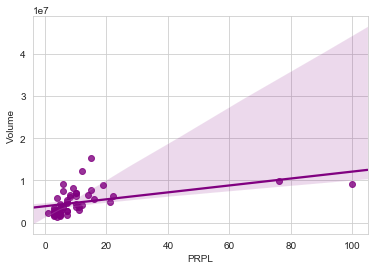

In [21]:
sns.regplot(x = dfPRPL['PRPL'], y = dfPRPL['Volume'], color = 'purple')

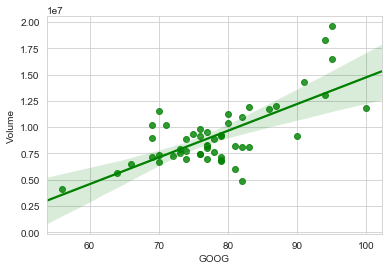

In [22]:
sns.regplot(x = dfGOOG['GOOG'], y = dfGOOG['Volume'], color = 'green')

In [27]:
modelSPRPL = sm.ols('AbsolutePctChange ~ GOOG',data=dfGOOG)
modelSPRPL = modelSPRPL.fit()

modelSTSLA = sm.ols('AbsolutePctChange ~ TSLA',data=dfTSLA)
modelSTSLA = modelSTSLA.fit()

modelSGOOG = sm.ols('AbsolutePctChange ~ GOOG',data=dfGOOG)
modelSGOOG = modelSGOOG.fit()

modelVPRPL = sm.ols('Volume ~ PRPL',data=dfPRPL)
modelVPRPL = modelVPRPL.fit()

modelVTSLA = sm.ols('Volume ~ TSLA',data=dfTSLA)
modelVTSLA = modelVTSLA.fit()

modelVGOOG = sm.ols('Volume ~ GOOG',data=dfGOOG)
modelVGOOG = modelVGOOG.fit()

models = [modelSPRPL,modelSTSLA,modelSGOOG,modelVPRPL,modelVTSLA,modelVGOOG]

In [42]:
def displayRegression(model,Title):
    print(Title)
    print(model.params)
    print('R Squared:', model.rsquared)
    print()

In [43]:
displayRegression(modelSPRPL,'Absolute Percent Change and Search Interest: PRPL')
displayRegression(modelSTSLA,'Absolute Percent Change and Search Interest: TSLA')
displayRegression(modelSGOOG,'Absolute Percent Change and Search Interest: GOOG')
displayRegression(modelVPRPL,'Volume and Search Interest: PRPL')
displayRegression(modelVTSLA,'Volume and Search Interest: TSLA')
displayRegression(modelVGOOG,'Volume and Search Interest: GOOG')

Absolute Percent Change and Search Interest: PRPL
Intercept   -0.033768
GOOG         0.000859
dtype: float64
R Squared: 0.07530569991560221

Absolute Percent Change and Search Interest: TSLA
Intercept    0.085841
TSLA         0.000492
dtype: float64
R Squared: 0.011673440651278066

Absolute Percent Change and Search Interest: GOOG
Intercept   -0.033768
GOOG         0.000859
dtype: float64
R Squared: 0.07530569991560221

Volume and Search Interest: PRPL
Intercept    3.904327e+06
PRPL         8.201245e+04
dtype: float64
R Squared: 0.2091624764022476

Volume and Search Interest: TSLA
Intercept    2.014455e+07
TSLA         7.370634e+06
dtype: float64
R Squared: 0.4441723298896433

Volume and Search Interest: GOOG
Intercept   -1.066835e+07
GOOG         2.540980e+05
dtype: float64
R Squared: 0.5009062105943543

